In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [10]:
path = r"C:\Users\bbuser\maather\unclean_laptop\laptopData.csv"
df = pd.read_csv(path)
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [11]:
df.info


<bound method DataFrame.info of       Unnamed: 0 Company            TypeName Inches  \
0            0.0   Apple           Ultrabook   13.3   
1            1.0   Apple           Ultrabook   13.3   
2            2.0      HP            Notebook   15.6   
3            3.0   Apple           Ultrabook   15.4   
4            4.0   Apple           Ultrabook   13.3   
...          ...     ...                 ...    ...   
1298      1298.0  Lenovo  2 in 1 Convertible     14   
1299      1299.0  Lenovo  2 in 1 Convertible   13.3   
1300      1300.0  Lenovo            Notebook     14   
1301      1301.0      HP            Notebook   15.6   
1302      1302.0    Asus            Notebook   15.6   

                                ScreenResolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x160

In [12]:
df.columns


Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [13]:
df['Unnamed: 0'].describe()

count    1273.000000
mean      652.674784
std       376.493027
min         0.000000
25%       327.000000
50%       652.000000
75%       980.000000
max      1302.000000
Name: Unnamed: 0, dtype: float64

In [14]:
df.drop('Unnamed: 0', axis=1, inplace=True)


In [15]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [16]:
df.columns = df.columns.str.strip()

In [17]:
df['Company'] = df['Company'].str.strip()

In [18]:
df['TypeName'] = df['TypeName'].str.strip()

In [19]:
df['ScreenResolution'] = df['ScreenResolution'].str.strip()

In [20]:
df['Gpu'] = df['Gpu'].str.strip()

In [21]:
df['OpSys'] = df['OpSys'].str.strip()

In [22]:
df['Memory'] = df['Memory'].str.strip()

In [23]:
df.isnull().sum()

Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [24]:
null_rows = df[df.isnull().all(axis=1)]
null_rows

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df.dropna(how='all', inplace=True)
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [26]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [27]:
df[df['Company'] == 0]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price


In [28]:
df[df['TypeName'] == 0]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price


In [29]:
df[df['Inches'] == 0]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price


In [30]:
df[df['ScreenResolution'] == 0]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price


In [31]:
df[df['Cpu'] == 0]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price


In [32]:
df[df['Ram'] == 0]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price


In [33]:
df[df['Memory'] == 0]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price


In [34]:
df[df['Gpu'] == 0]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price


In [35]:
df[df['OpSys'] == 0]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price


In [36]:
df[df['Weight'] == 0]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price


In [37]:
df[df['Price'] == 0]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price


In [38]:
df.Company.unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [39]:
dup_values = df[df.duplicated()]
dup_values

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1274,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.3200
1275,Asus,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,1.2kg,38841.1200
1276,Dell,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.3kg,24455.5200
1277,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,15397.9200
1278,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,500GB HDD,Intel HD Graphics,Windows 10,2.20kg,20193.1200
1279,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.6kg,47898.7200
1280,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04kg,29303.4672
1281,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.3kg,42943.1472
1282,HP,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,11135.5200
1283,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378.6496


In [40]:
df.groupby(['Company' , 'TypeName'])['TypeName'].count()

Company    TypeName          
Acer       2 in 1 Convertible      8
           Gaming                  8
           Netbook                 5
           Notebook               78
           Ultrabook               4
Apple      Ultrabook              21
Asus       2 in 1 Convertible     13
           Gaming                 53
           Netbook                 3
           Notebook               67
           Ultrabook              20
Chuwi      Notebook                3
Dell       2 in 1 Convertible     28
           Gaming                 40
           Netbook                 2
           Notebook              159
           Ultrabook              47
           Workstation            11
Fujitsu    Notebook                2
Google     Ultrabook               3
HP         2 in 1 Convertible     18
           Gaming                 12
           Netbook                 9
           Notebook              179
           Ultrabook              34
           Workstation            14
Huawei  

In [41]:
df.groupby(['Company' , 'TypeName' , 'Cpu'])['Cpu'].count()

Company  TypeName            Cpu                                 
Acer     2 in 1 Convertible  Intel Celeron Dual Core N3060 1.6GHz    1
                             Intel Celeron Dual Core N3350 2.0GHz    1
                             Intel Celeron Quad Core N3160 1.6GHz    1
                             Intel Core i5 6200U 2.3GHz              1
                             Intel Core i5 8250U 1.6GHz              2
                                                                    ..
Vero     Notebook            Intel Celeron Dual Core N3350 1.1GHz    2
Xiaomi   Notebook            Intel Core i5 8250U 1.6GHz              1
                             Intel Core i7 8550U 1.8GHz              1
         Ultrabook           Intel Core i5 6200U 2.3GHz              1
                             Intel Core i5 7200U 2.5GHz              1
Name: Cpu, Length: 354, dtype: int64

In [42]:
df.drop_duplicates(inplace=True)
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378.6496
1270,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1272,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200


In [43]:
dup_values = df[df.duplicated()]
dup_values

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price


In [44]:
df.dtypes

Company              object
TypeName             object
Inches               object
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

In [45]:
# Function to check if a value can be converted to float
def is_not_float(x):
    try:
        float(x)
        return False  # means it's a valid float
    except:
        return True   # means it's not convertible

# Filter rows where 'Inches' is not a float-compatible value
non_numeric_inches = df[df['Inches'].apply(is_not_float)]
print(non_numeric_inches)


    Company     TypeName Inches   ScreenResolution  \
476    Dell  Workstation      ?  Full HD 1920x1080   

                             Cpu  Ram     Memory                  Gpu  \
476  Intel Core i7 7700HQ 2.8GHz  8GB  256GB SSD  Nvidia Quadro M1200   

          OpSys  Weight      Price  
476  Windows 10  1.78kg  128298.24  


In [46]:
df['Inches'] = pd.to_numeric(df['Inches'], errors='coerce') #converts valid entries to float.Invalid entries become NaN

In [47]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378.6496
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200


In [48]:
df.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

In [49]:
df[df['Memory'] == '?']

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
770,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,?,AMD Radeon R7 M445,Windows 10,2.3kg,62938.0656


In [50]:
df[df['Ram'] == '16GB'].groupby(['Memory','Ram','Gpu','TypeName'])['Ram'].count().reset_index(name='Count')


,Memory,Ram,Gpu,TypeName,Count
0,1.0TB Hybrid,16GB,AMD Radeon R7 M360,Notebook,1
1,128GB SSD + 1TB HDD,16GB,Nvidia GeForce GTX 1050,Notebook,1
2,128GB SSD + 1TB HDD,16GB,Nvidia GeForce GTX 1050 Ti,Gaming,2
3,128GB SSD + 1TB HDD,16GB,Nvidia GeForce GTX 1060,Gaming,5
4,128GB SSD + 1TB HDD,16GB,Nvidia GeForce GTX 1060,Notebook,1
...,...,...,...,...,...
94,512GB SSD + 1TB HDD,16GB,Nvidia GeForce GTX 980M,Gaming,1
95,512GB SSD + 256GB SSD,16GB,Intel UHD Graphics 620,Ultrabook,1
96,512GB SSD + 2TB HDD,16GB,Nvidia GeForce GTX 1060,Gaming,1
97,512GB SSD + 2TB HDD,16GB,Nvidia GeForce GTX 950M,2 in 1 Convertible,1


In [51]:
df.isnull().sum()

Company             0
TypeName            0
Inches              1
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [52]:
unit = df['Ram'].dropna().iloc[0][-2:] if df['Ram'].dropna().iloc[0][-2:].isalpha() else '' # Extract unit (e.g., 'GB')
unit

'GB'

In [53]:
df['Ram'] = df['Ram'].str.extract('(\d+)').astype(float).astype('Int64') # Extract number and convert to integer
df['Ram']

0        8
1        8
2        8
3       16
4        8
        ..
1269     4
1270     4
1271    16
1272     2
1273     6
Name: Ram, Length: 1244, dtype: Int64

In [54]:
df.rename(columns={'Ram': f'Ram({unit})'}, inplace=True) # Rename the column to include unit

In [55]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378.6496
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200


In [56]:
df[df['Ram(GB)'] == '?']

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight,Price


In [57]:
df[df['Memory'] == '?']

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight,Price
770,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16,?,AMD Radeon R7 M445,Windows 10,2.3kg,62938.0656


In [58]:
df = df[~df.isin(['?']).any(axis=1)]

In [59]:
df[df['Memory'] == '?']

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight,Price


In [60]:
df.isnull().sum()

Company             0
TypeName            0
Inches              1
ScreenResolution    0
Cpu                 0
Ram(GB)             0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [61]:
df = df.dropna(subset=['Inches'])

In [62]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram(GB)             0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [63]:
unit = df['Weight'].dropna().iloc[0][-2:] if df['Weight'].dropna().iloc[0][-2:].isalpha() else '' # Extract unit
unit

'kg'

In [64]:
df['Weight'] = df['Weight'].str.extract(r'([\d.]+)').astype(float) 
df['Weight']

0       1.37
1       1.34
2       1.86
3       1.83
4       1.37
        ... 
1269    2.20
1270    1.80
1271    1.30
1272    1.50
1273    2.19
Name: Weight, Length: 1241, dtype: float64

In [65]:
df.rename(columns={'Weight': f'Weight({unit})'}, inplace=True)
df


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight(kg),Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.6496
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200


In [66]:
# Extract full CPU speed with unit (e.g., 2.5GHz, 3.1GHz)
df['Cpu Unit'] = df['Cpu'].str.extract(r'(\d+\.?\d*\s*[GM]Hz)', expand=False)
df['Cpu Unit']

0       2.3GHz
1       1.8GHz
2       2.5GHz
3       2.7GHz
4       3.1GHz
         ...  
1269    2.5GHz
1270    2.5GHz
1271    2.5GHz
1272    1.6GHz
1273    2.5GHz
Name: Cpu Unit, Length: 1241, dtype: object

In [67]:
# Remove the CPU speed and unit from the 'Cpu' column
df['Cpu'] = df['Cpu'].str.replace(r'\s*\d+\.?\d*\s*[GM]Hz', '', regex=True).str.strip()
# Move 'Cpu Unit' to be directly after 'Cpu'
cols = list(df.columns)
cols.remove('Cpu Unit')
cpu_index = cols.index('Cpu')
cols.insert(cpu_index + 1, 'Cpu Unit')
df = df[cols]
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Cpu Unit,Ram(GB),Memory,Gpu,OpSys,Weight(kg),Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5,1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U,2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7,2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U,2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.6496
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U,2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U,2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050,1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200


In [68]:
# Step 1: Ensure 'Memory' is string
df['Memory'] = df['Memory'].astype(str).str.strip()
df['Memory']



0                 128GB SSD
1       128GB Flash Storage
2                 256GB SSD
3                 512GB SSD
4                 256GB SSD
               ...         
1269              500GB HDD
1270              128GB SSD
1271              512GB SSD
1272     64GB Flash Storage
1273                1TB HDD
Name: Memory, Length: 1241, dtype: object

In [69]:
def extract_memory_parts(mem_string): # Function to split memory values and types
    mem_string = str(mem_string).upper().strip()  # Convert to string safely
    # Extract memory sizes (with units like GB, TB)
    values = re.findall(r'\d+\s*(?:GB|TB)', mem_string)
    # Extract memory types (like SSD, HDD, etc.)
    types = re.findall(r'\b(SSD|HDD|EMMC|FLASH|HYBRID)\b', mem_string)
    return pd.Series([' + '.join(values), ' + '.join(types)])

# Apply the function
df[['Memory', 'Memory Type']] = df['Memory'].apply(extract_memory_parts)

# Move 'Memory Type' next to 'Memory'
cols = list(df.columns)
cols.remove('Memory Type')
mem_index = cols.index('Memory')
cols.insert(mem_index + 1, 'Memory Type')
df = df[cols]

df

,Company,TypeName,Inches,ScreenResolution,Cpu,Cpu Unit,Ram(GB),Memory,Memory Type,Gpu,OpSys,Weight(kg),Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,2.3GHz,8,128GB,SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5,1.8GHz,8,128GB,FLASH,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U,2.5GHz,8,256GB,SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7,2.7GHz,16,512GB,SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,3.1GHz,8,256GB,SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U,2.5GHz,4,500GB,HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.6496
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U,2.5GHz,4,128GB,SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U,2.5GHz,16,512GB,SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050,1.6GHz,2,64GB,FLASH,Intel HD Graphics,Windows 10,1.50,12201.1200


df.to_excel(r"C:\\Users\\bbuser\\OneDrive\\Desktop\\maather\\laptop_clean.xlsx",index=False)

In [70]:
df.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Cpu Unit             object
Ram(GB)               Int64
Memory               object
Memory Type          object
Gpu                  object
OpSys                object
Weight(kg)          float64
Price               float64
dtype: object

<Axes: xlabel='Company'>

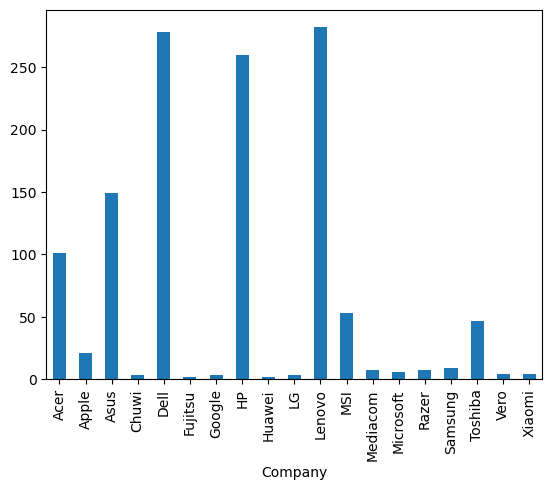

In [71]:
df['Company'].value_counts().sort_index().plot(kind='bar')


<Axes: xlabel='Company'>

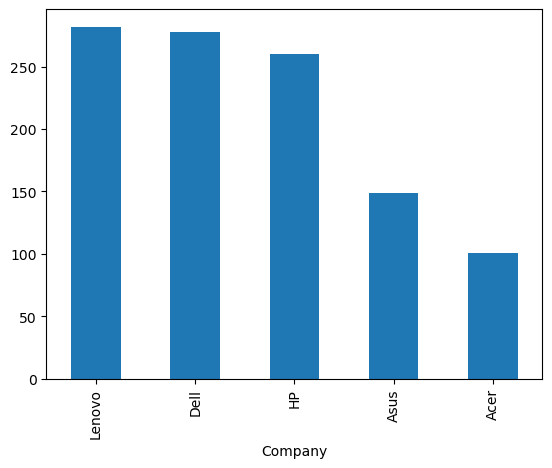

In [72]:
top5 = df.groupby('Company')['Price'].count().sort_values(ascending=False).head(5)
top5.plot(kind='bar')


In [73]:
encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = encoder.fit_transform(df[col])
df[col]

0       8
1       8
2       4
3       8
4       8
       ..
1269    5
1270    5
1271    5
1272    5
1273    5
Name: OpSys, Length: 1241, dtype: int64

In [74]:
df.dtypes

Company               int64
TypeName              int64
Inches              float64
ScreenResolution      int64
Cpu                   int64
Cpu Unit              int64
Ram(GB)               Int64
Memory                int64
Memory Type           int64
Gpu                   int64
OpSys                 int64
Weight(kg)          float64
Price               float64
dtype: object

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features (X) and target (y) from the DataFrame
X = df.drop('Price', axis=1)
y = df['Price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model (metrics explained later)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--- Linear Regression Results ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

--- Linear Regression Results ---
Mean Squared Error (MSE): 461567936.33
R-squared (R2): 0.65
